In [1]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw, ImageFont

In [2]:
import os

In [3]:
os.listdir()

['image_processing.ipynb',
 'img-01.png',
 'img-02.png',
 'img-03.png',
 'img-04.png',
 'img-05.png',
 'the_kid_rotated.png']

In [4]:
im1 = Image.open('img-01.png')
im2 = Image.open('img-02.png')
im3 = Image.open('img-03.png')
im4 = Image.open('img-04.png')
im5 = Image.open('img-05.png')

In [5]:
print(f'Format: {im4.format}')
print(f'Mode: {im4.mode}')
print(f'Size: {im4.size}')
print(f'info: {im4.info}')

Format: PNG
Mode: RGB
Size: (650, 900)
info: {}


resize

In [6]:
h = im1.height
w = im1.width
# scale to 3x
im1_bigger = im1.resize((w*3, h*3))
im1_bigger.show()

In [7]:
batman_logo = im5.resize((im5.width//3, im5.height//3)) # reduce size by 1/3
batman_logo.show()

rotate and transpose

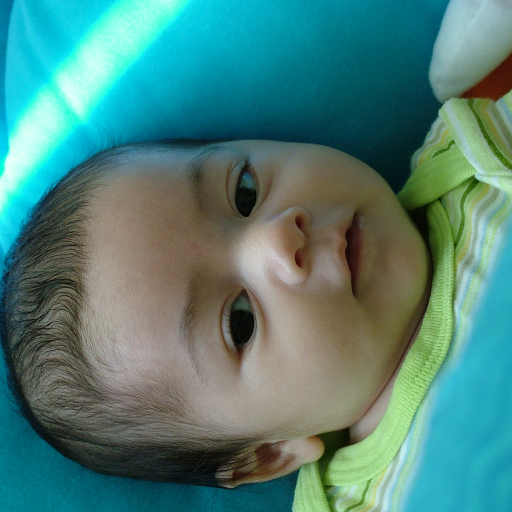

In [8]:
im2.rotate(90)

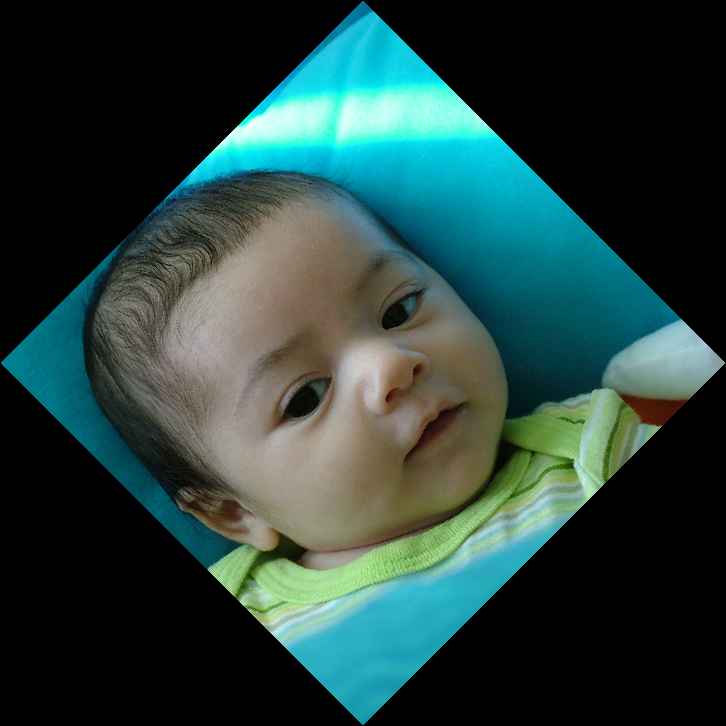

In [9]:
im2.rotate(45, expand=True)

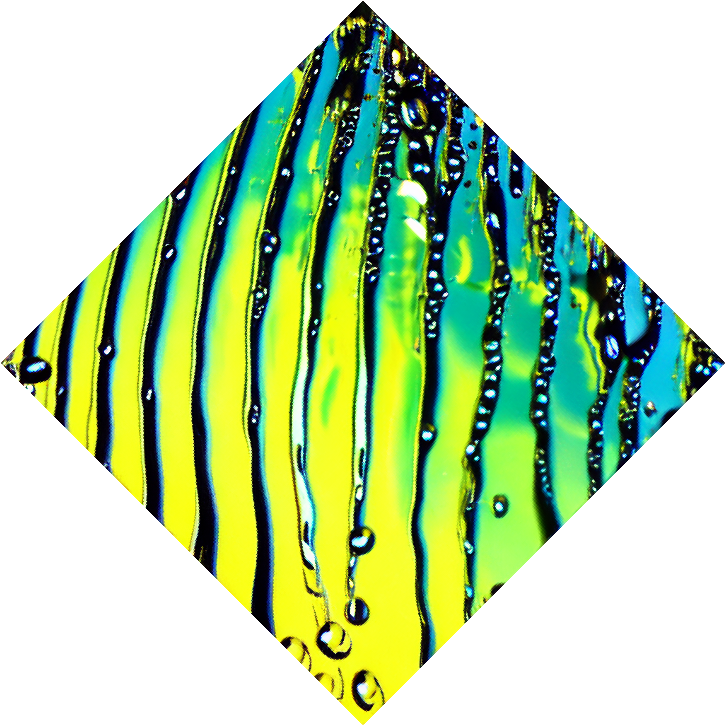

In [10]:
im1.rotate(45, expand=True, fillcolor='white')

In [11]:
im2.rotate(45, expand=True, fillcolor='yellow').save('the_kid_rotated.png')

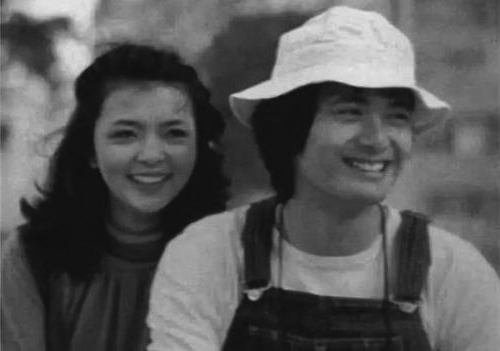

In [12]:
im3.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

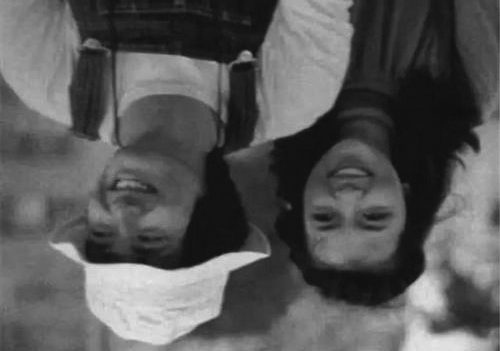

In [13]:
im3.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

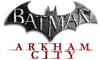

In [14]:
w,h = batman_logo.width, batman_logo.height
batman_logo = batman_logo.resize((w//2, h//2)) # 50% of original size
batman_logo

In [15]:
batman_logo.mode

'RGBA'

pasting

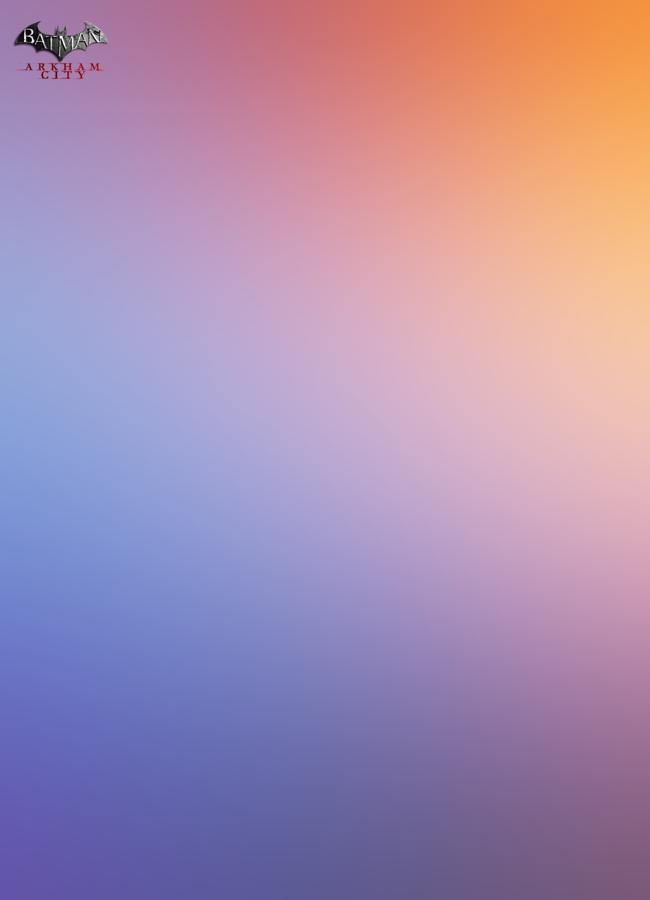

In [16]:
wallpaper = im4.copy()
wallpaper.paste(batman_logo, (10, 20), mask=batman_logo)
wallpaper

In [17]:
im4.size

(650, 900)

cropping

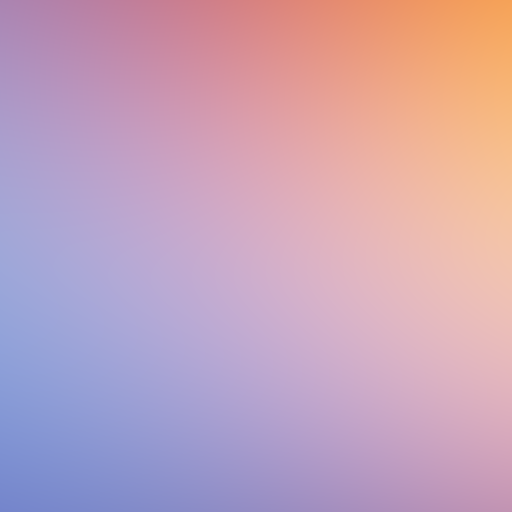

In [20]:
w, h = im4.width , im4.height
grad_image = im4.crop((100,100, 612, 612))
grad_image

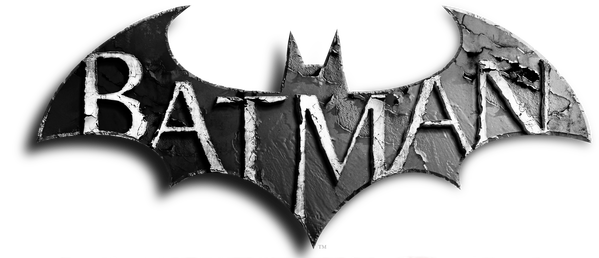

In [28]:
w, h = im5.width, im5.height
clean_logo = im5.crop((0,0, 599, 258))
clean_logo.save('batsign.png')
clean_logo

blending

In [33]:
a = grad_image.resize((im1.width, im1.height))
b = im1.copy()
a = a.convert('RGB')
b = b.convert('RGB')

In [41]:
c = im2.resize((im1.width, im1.height))
c = c.convert('RGB')

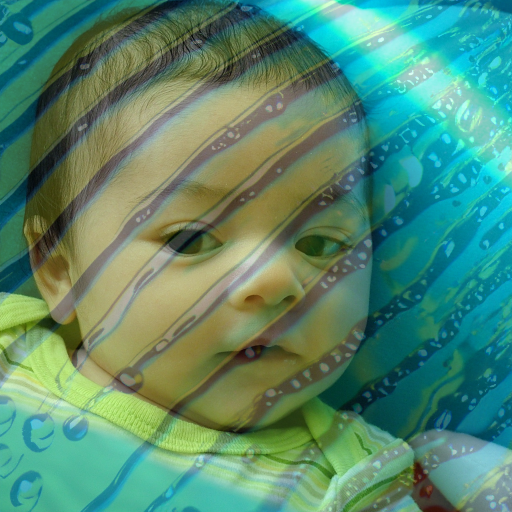

In [46]:
Image.blend(b, c, .8)

filters

In [55]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EDGE_ENHANCE_MORE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.SMOOTH_MORE,
    ImageFilter.SHARPEN
]

for i,f in enumerate(filters):
    im5.filter(f).save(f'generated/filter_{i}.png')

In [57]:
im2.filter(ImageFilter.MaxFilter(7)).show()  
im2.filter(ImageFilter.MinFilter(7)).show()  
im2.filter(ImageFilter.ModeFilter(7)).show()
im2.filter(ImageFilter.MedianFilter(7)).show()
im2.filter(ImageFilter.GaussianBlur(7)).show()

enhancing images

In [60]:
enIm1 = ImageEnhance.Color(im1)
enIm1.enhance(-1).show()

In [61]:
for i in range(-10,11):
    enIm1.enhance(i).save(f'generated/colorboost_{i}.png')

drawing on images

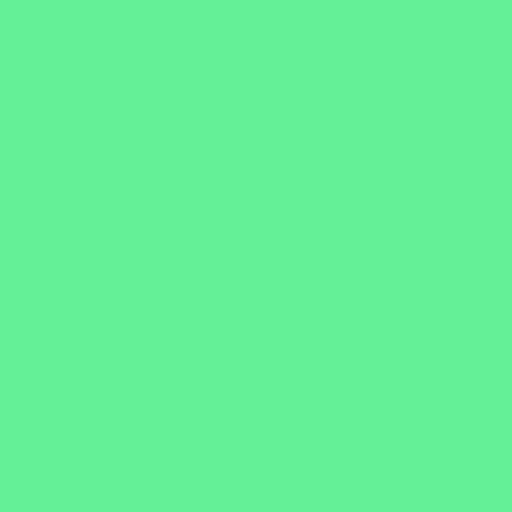

In [66]:
# a green image of 512x512
im6 = Image.new('RGB', (512, 512), (100,240, 150))
im6

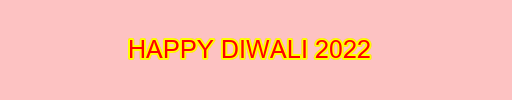

In [91]:
im7 = Image.new('RGBA', (512, 100), (250,100, 100, 100))
msg ="HAPPY DIWALI 2022"
font = "arial.ttf"
fontsize = 25
fontcolor = 'red'
font = font=ImageFont.truetype(font, fontsize)
pos = (512//4, 35)
draw_im7 = ImageDraw.Draw(im7)
draw_im7.text(pos, msg, fontcolor, font, align='center',
    stroke_width=2, stroke_fill='yellow')
im7

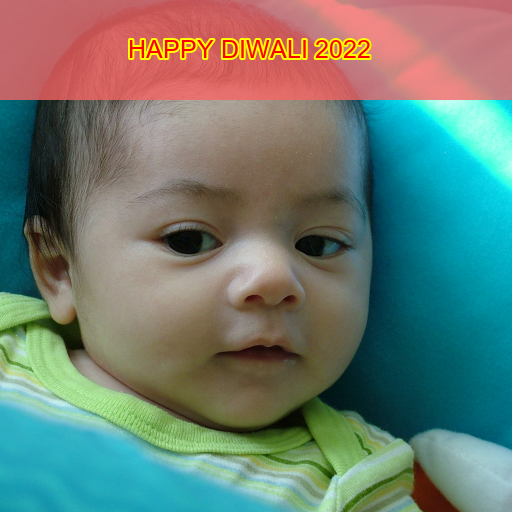

In [95]:
im2.paste(im7, (0, 0), mask=im7)
im2